In [44]:
import pandas as pd
import seaborn as sns
dataset = pd.read_csv("incident_event_log.csv")
dataset.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


In [28]:
!pip install seaborn

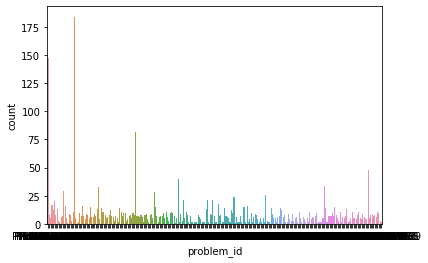

In [37]:
sns.countplot(x = 'problem_id', data = dataset)

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


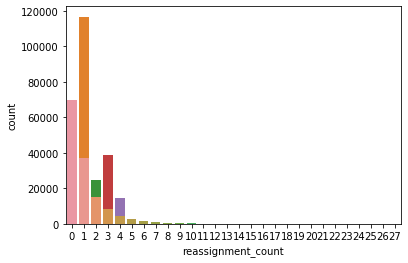

In [53]:
column = [columns for columns in dataset]
for i in range(1,4):
    print(sns.countplot(x = str(column[i]), data = dataset))

In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
number                     141712 non-null object
incident_state             141712 non-null object
active                     141712 non-null bool
reassignment_count         141712 non-null int64
reopen_count               141712 non-null int64
sys_mod_count              141712 non-null int64
made_sla                   141712 non-null bool
caller_id                  141712 non-null object
opened_by                  141712 non-null object
opened_at                  141712 non-null object
sys_created_by             141712 non-null object
sys_created_at             141712 non-null object
sys_updated_by             141712 non-null object
sys_updated_at             141712 non-null object
contact_type               141712 non-null object
location                   141712 non-null object
category                   141712 non-null object
subcategory                141712 non-null obj

In [3]:
dataset.describe()

,reassignment_count,reopen_count,sys_mod_count
count,141712.000000,141712.000000,141712.000000
mean,1.104197,0.021918,5.080946
std,1.734673,0.207302,7.680652
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,1.000000,0.000000,3.000000
75%,1.000000,0.000000,6.000000
max,27.000000,8.000000,129.000000


In [48]:
import numpy as np
dataset = dataset.replace("?","unknown")

In [80]:
df2 = dataset.replace("unknown",np.nan)
df2.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at,rest_time
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,1456704960,...,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,1457175600,470640
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,1456704960,...,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,1457175600,470640
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,1456704960,...,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,1457175600,470640
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,1456704960,...,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,1457175600,470640
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,1456717200,...,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 81,1/3/2016 09:52,1457254800,537600


In [81]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 37 columns):
number                     141712 non-null object
incident_state             141712 non-null object
active                     141712 non-null bool
reassignment_count         141712 non-null int64
reopen_count               141712 non-null int64
sys_mod_count              141712 non-null int64
made_sla                   141712 non-null bool
caller_id                  141683 non-null object
opened_by                  136877 non-null object
opened_at                  141712 non-null int64
sys_created_by             88636 non-null object
sys_created_at             88636 non-null object
sys_updated_by             141712 non-null object
sys_updated_at             141712 non-null object
contact_type               141712 non-null object
location                   141636 non-null object
category                   141634 non-null object
subcategory                141601 non-null object

In [49]:
dataset

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,unknown,unknown,unknown,unknown,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,unknown,unknown,unknown,unknown,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,unknown,unknown,unknown,unknown,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,unknown,unknown,unknown,unknown,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,unknown,unknown,unknown,unknown,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
5,INC0000047,Active,True,1,0,1,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,unknown,unknown,unknown,unknown,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
6,INC0000047,Active,True,1,0,2,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,unknown,unknown,unknown,unknown,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
7,INC0000047,Active,True,1,0,3,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,unknown,unknown,unknown,unknown,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
8,INC0000047,Active,True,1,0,4,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,unknown,unknown,unknown,unknown,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
9,INC0000047,Active,True,1,0,5,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,unknown,unknown,unknown,unknown,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


In [50]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
number                     141712 non-null object
incident_state             141712 non-null object
active                     141712 non-null bool
reassignment_count         141712 non-null int64
reopen_count               141712 non-null int64
sys_mod_count              141712 non-null int64
made_sla                   141712 non-null bool
caller_id                  141712 non-null object
opened_by                  141712 non-null object
opened_at                  141712 non-null object
sys_created_by             141712 non-null object
sys_created_at             141712 non-null object
sys_updated_by             141712 non-null object
sys_updated_at             141712 non-null object
contact_type               141712 non-null object
location                   141712 non-null object
category                   141712 non-null object
subcategory                141712 non-null obj

In [54]:
dataset.to_csv("unknown.csv")

In [6]:
len(dataset)

141712

In [20]:
dataset.drop(["cmdb_ci","problem_id","rfc","vendor","caused_by"],axis = 1)

number                     0
incident_state             0
active                     0
reassignment_count         0
reopen_count               0
sys_mod_count              0
made_sla                   0
caller_id                  0
opened_by                  0
opened_at                  0
sys_created_by             0
sys_created_at             0
sys_updated_by             0
sys_updated_at             0
contact_type               0
location                   0
category                   0
subcategory                0
u_symptom                  0
cmdb_ci                    0
impact                     0
urgency                    0
priority                   0
assignment_group           0
assigned_to                0
knowledge                  0
u_priority_confirmation    0
notify                     0
problem_id                 0
rfc                        0
vendor                     0
caused_by                  0
closed_code                0
resolved_by                0
resolved_at   

In [43]:
incident_state = dataset["incident_state"].tolist()

In [44]:
active = dataset["active"].tolist()

In [46]:
incident_state_dic = sum_of_catogery(incident_state)
incident_state_dic

defaultdict(int,
            {'New': 36407,
             'Resolved': 25751,
             'Closed': 24985,
             'Active': 38716,
             'Awaiting User Info': 14642,
             'Awaiting Problem': 461,
             'Awaiting Vendor': 707,
             'Awaiting Evidence': 38,
             '-100': 5})

In [47]:
active_dic = sum_of_catogery(active)
active_dic

defaultdict(int, {True: 116726, False: 24986})

In [5]:
# define a function, try to find the catogery and its number of each column
from collections import defaultdict

def column_to_list(dataset,name_of_list):
    alist = dataset[name_of_list].tolist()
    return alist

def sum_of_catogery(catogery_list):
    dic = defaultdict(int)
    for a in catogery_list:
        dic[a] += 1
    
    return dic

def df_to_ddic(dataset,column_name):
    a = column_to_list(dataset,column_name)
    dic = sum_of_catogery(a)
    
    return dic

In [6]:
# sort the dictionary by key
def sort_by_key(dd):
    d = dict(dd)
    d = sorted(d.items(), key = lambda item:item[0])

    return d

In [14]:
made_sla_dic = df_to_ddic(dataset,"made_sla")
made_sla_dic, len(made_sla_dic)

(defaultdict(int, {True: 132497, False: 9215}), 2)

In [15]:
contact_type_dic = df_to_ddic(dataset,"contact_type")
contact_type_dic, len(contact_type_dic)

(defaultdict(int,
             {'Phone': 140462,
              'Email': 220,
              'Self service': 995,
              'Direct opening': 17,
              'IVR': 18}),
 5)

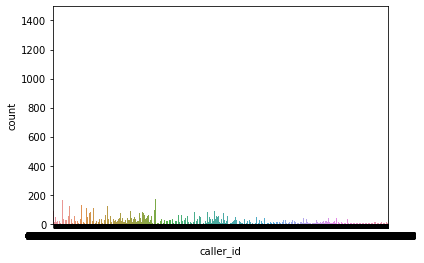

In [43]:
caller_id_ddic = df_to_ddic(dataset,"caller_id")
caller_id_ddic
sns.countplot(dataset["caller_id"])

In [33]:
problem_id_ddic = df_to_ddic(dataset,"problem_id")
problem_id_ddic

defaultdict(int,
            {'?': 139417,
             'Problem ID  2': 147,
             'Problem ID  4': 8,
             'Problem ID  44': 5,
             'Problem ID  141': 17,
             'Problem ID  5': 12,
             'Problem ID  17': 20,
             'Problem ID  23': 8,
             'Problem ID  20': 13,
             'Problem ID  19': 3,
             'Problem ID  24': 2,
             'Problem ID  12': 6,
             'Problem ID  6': 7,
             'Problem ID  7': 29,
             'Problem ID  10': 16,
             'Problem ID  40': 5,
             'Problem ID  33': 1,
             'Problem ID  26': 9,
             'Problem ID  15': 8,
             'Problem ID  9': 3,
             'Problem ID  8': 11,
             'Problem ID  14': 184,
             'Problem ID  18': 5,
             'Problem ID  11': 1,
             'Problem ID  72': 2,
             'Problem ID  246': 10,
             'Problem ID  16': 7,
             'Problem ID  21': 16,
             'Problem ID  28': 

In [23]:
column = [columns for columns in dataset]
for i in range(1,len(column)):
    print(len(df_to_ddic(dataset, str(column[i]))))

9
2
28
9
115
2
5245
208
19849
186
11553
846
50664
5
225
59
255
526
51
3
3
4
79
235
2
2
2
253
182
5
4
18
217
18506
2707


In [63]:
impact_dict = df_to_ddic("impact")
impact_dict

defaultdict(int, {'2 - Medium': 134335, '1 - High': 3491, '3 - Low': 3886})

In [65]:
urgency_dict = df_to_ddic("urgency")
urgency_dict

defaultdict(int, {'2 - Medium': 134094, '3 - Low': 3598, '1 - High': 4020})

In [66]:
priority_dict = df_to_ddic("priority")
priority_dict

defaultdict(int,
            {'3 - Moderate': 132452,
             '2 - High': 2972,
             '4 - Low': 4030,
             '1 - Critical': 2258})

In [164]:
notify_dict = df_to_ddic(dataset, "notify")
notify_dict

defaultdict(int, {'Do Not Notify': 141593, 'Send Email': 119})

In [165]:
resolved_at_dic = df_to_ddic(dataset, "resolved_at")
r = dict(resolved_at_dic)
r["?"]
# how many "?" values considered as NA does "resolved_at" column have?

3141

In [163]:
closed_at_ddic = df_to_ddic(dataset,"closed_at")

# Dose "closed_at" column have "?" value?
c = dict(closed_at_ddic)
if "?" in c.keys():
    print("True")
else: 
    print("False")

False


## plot the "resolved_at" and "closed_at", try to find the relation between them

In [166]:
# delete the "?" value of "resolved_at" column in dataframe and plot it with "closed_at" column
df2=dataset[~dataset['resolved_at'].isin(["?"])]
len(df2)

138571

In [160]:
resolved_at_dict2 = df_to_ddic(df2,"resolved_at")
r2 = dict(resolved_at_dict2)
if "?" in r2.keys():
    print("True")
else: 
    print("False")

False


In [110]:
len(df2)

138571

## Change date and time to timestamps.

In [56]:
import time, datetime
from datetime import datetime

def time2stamp(cmnt_time):   #转时间戳函数
    cmnt_time=datetime.strptime(cmnt_time,'%d/%m/%Y %H:%M')
    stamp=int(datetime.timestamp(cmnt_time))
    return stamp

In [140]:
df2["resolved_at"] = df2["resolved_at"].apply(time2stamp)

/Users/chenshuyu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [57]:
dataset["closed_at"] = dataset["closed_at"].apply(time2stamp)

In [58]:
dataset["opened_at"] = dataset["opened_at"].apply(time2stamp)

In [60]:
dataset.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,1456704960,...,False,Do Not Notify,unknown,unknown,unknown,unknown,code 5,Resolved by 149,29/2/2016 11:29,1457175600
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,1456704960,...,False,Do Not Notify,unknown,unknown,unknown,unknown,code 5,Resolved by 149,29/2/2016 11:29,1457175600
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,1456704960,...,False,Do Not Notify,unknown,unknown,unknown,unknown,code 5,Resolved by 149,29/2/2016 11:29,1457175600
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,1456704960,...,False,Do Not Notify,unknown,unknown,unknown,unknown,code 5,Resolved by 149,29/2/2016 11:29,1457175600
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,1456717200,...,False,Do Not Notify,unknown,unknown,unknown,unknown,code 5,Resolved by 81,1/3/2016 09:52,1457254800


In [167]:
%matplotlib notebook

<IPython.core.display.Javascript object>


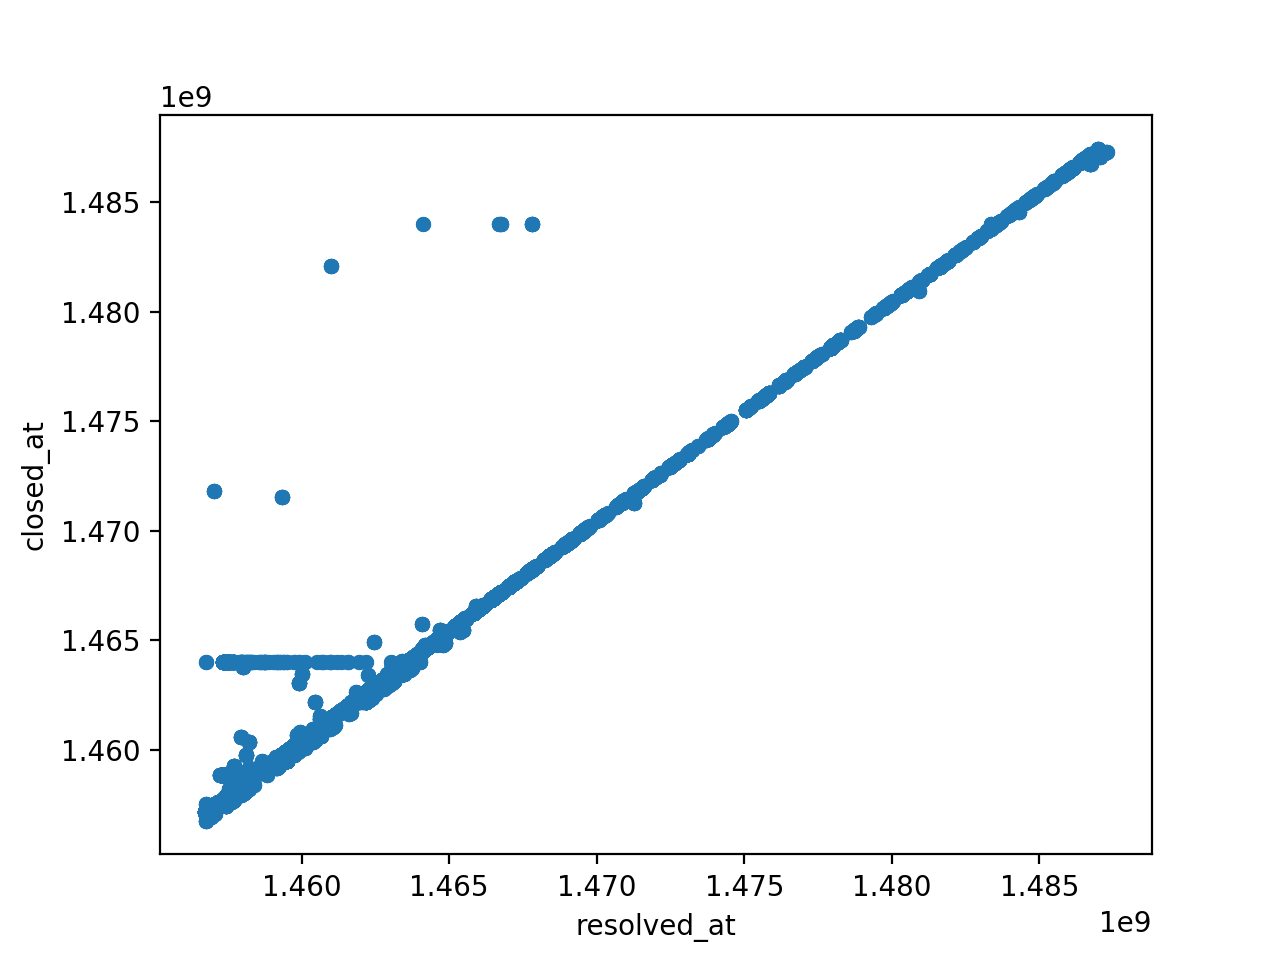

In [145]:
df2.plot.scatter(x="resolved_at",y="closed_at")

In [ ]:
# Obviously, those two column is a linear regression, so when choosing the target, "closed_at" 
# column is better as it doesn't have "?" value.

In [82]:
# 删除空值很多的列
df3 = df2.drop(["problem_id","cmdb_ci","rfc","vendor","caused_by"],axis = 1)

In [92]:
df3.dtypes

number                     category
incident_state               object
active                         bool
reassignment_count            int64
reopen_count                  int64
sys_mod_count                 int64
made_sla                       bool
caller_id                    object
opened_by                    object
opened_at                     int64
sys_created_by               object
sys_created_at               object
sys_updated_by               object
sys_updated_at               object
contact_type                 object
location                     object
category                     object
subcategory                  object
u_symptom                    object
impact                       object
urgency                      object
priority                     object
assignment_group             object
assigned_to                  object
knowledge                      bool
u_priority_confirmation        bool
notify                       object
closed_code                 

In [117]:
df3.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,closed_at,rest_time
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,1456704960,...,Group 56,NaN,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,1457175600,470640
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,1456704960,...,Group 56,NaN,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,1457175600,470640
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,1456704960,...,Group 56,NaN,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,1457175600,470640
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,1456704960,...,Group 56,NaN,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,1457175600,470640
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,1456717200,...,Group 70,Resolver 89,True,False,Do Not Notify,code 5,Resolved by 81,1/3/2016 09:52,1457254800,537600


In [118]:
df3.dtypes

number                     category
incident_state               object
active                         bool
reassignment_count            int64
reopen_count                  int64
sys_mod_count                 int64
made_sla                       bool
caller_id                    object
opened_by                    object
opened_at                     int64
sys_created_by               object
sys_created_at               object
sys_updated_by               object
sys_updated_at               object
contact_type                 object
location                     object
category                     object
subcategory                  object
u_symptom                    object
impact                       object
urgency                      object
priority                     object
assignment_group             object
assigned_to                  object
knowledge                      bool
u_priority_confirmation        bool
notify                       object
closed_code                 

In [87]:
df3["number"] = pd.to_numeric(df3["number"])

ValueError: Unable to parse string "INC0000045" at position 0

In [151]:
df4 = df.drop(["problem_id","cmdb_ci","rfc","vendor","caused_by"],axis = 1)

In [152]:
df4.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,sys_created_by,...,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,rest_time
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,Created by 6,...,3 - Moderate,Group 56,unknown,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,470640
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,Created by 6,...,3 - Moderate,Group 56,unknown,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,470640
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,Created by 6,...,3 - Moderate,Group 56,unknown,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,470640
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,Created by 6,...,3 - Moderate,Group 56,unknown,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,470640
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,Created by 171,...,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,code 5,Resolved by 81,1/3/2016 09:52,537600


In [97]:
df4["resolved_at"] = df4["resolved_at"].apply(time2stamp)

In [176]:
df5 = df4.drop(["resolved_at"],axis = 1)

In [99]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 30 columns):
number                     141712 non-null category
incident_state             141712 non-null object
active                     141712 non-null bool
reassignment_count         141712 non-null int64
reopen_count               141712 non-null int64
sys_mod_count              141712 non-null int64
made_sla                   141712 non-null bool
caller_id                  141712 non-null object
opened_by                  141712 non-null object
sys_created_by             141712 non-null object
sys_created_at             141712 non-null object
sys_updated_by             141712 non-null object
sys_updated_at             141712 non-null object
contact_type               141712 non-null object
location                   141712 non-null object
category                   141712 non-null object
subcategory                141712 non-null object
u_symptom                  141712 non-null o

In [ ]:
for i in range(len(df4)):
    

In [ ]:
df4[1]

In [62]:
dataset["rest_time"] = dataset.apply(lambda x: x['closed_at'] -  x['opened_at'], axis=1)

In [63]:
dataset.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at,rest_time
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,1456704960,...,Do Not Notify,unknown,unknown,unknown,unknown,code 5,Resolved by 149,29/2/2016 11:29,1457175600,470640
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,1456704960,...,Do Not Notify,unknown,unknown,unknown,unknown,code 5,Resolved by 149,29/2/2016 11:29,1457175600,470640
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,1456704960,...,Do Not Notify,unknown,unknown,unknown,unknown,code 5,Resolved by 149,29/2/2016 11:29,1457175600,470640
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,1456704960,...,Do Not Notify,unknown,unknown,unknown,unknown,code 5,Resolved by 149,29/2/2016 11:29,1457175600,470640
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,1456717200,...,Do Not Notify,unknown,unknown,unknown,unknown,code 5,Resolved by 81,1/3/2016 09:52,1457254800,537600


In [64]:
df = dataset.drop(["opened_at","closed_at"],axis = 1)

In [65]:
df.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,sys_created_by,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,rest_time
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,Created by 6,...,False,Do Not Notify,unknown,unknown,unknown,unknown,code 5,Resolved by 149,29/2/2016 11:29,470640
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,Created by 6,...,False,Do Not Notify,unknown,unknown,unknown,unknown,code 5,Resolved by 149,29/2/2016 11:29,470640
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,Created by 6,...,False,Do Not Notify,unknown,unknown,unknown,unknown,code 5,Resolved by 149,29/2/2016 11:29,470640
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,Created by 6,...,False,Do Not Notify,unknown,unknown,unknown,unknown,code 5,Resolved by 149,29/2/2016 11:29,470640
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,Created by 171,...,False,Do Not Notify,unknown,unknown,unknown,unknown,code 5,Resolved by 81,1/3/2016 09:52,537600


In [121]:
from sklearn.preprocessing import LabelEncoder

In [127]:
def convert(data,column):
    number = LabelEncoder()
    data[column] = number.fit_transform(data[column])
    data=data.fillna(-999)
    return data

In [128]:
convert(df4,"number")

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,sys_created_by,...,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,rest_time
0,0,New,True,0,0,0,True,Caller 2403,Opened by 8,Created by 6,...,3 - Moderate,Group 56,unknown,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,470640
1,0,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,Created by 6,...,3 - Moderate,Group 56,unknown,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,470640
2,0,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,Created by 6,...,3 - Moderate,Group 56,unknown,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,470640
3,0,Closed,False,0,0,4,True,Caller 2403,Opened by 8,Created by 6,...,3 - Moderate,Group 56,unknown,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,470640
4,1,New,True,0,0,0,True,Caller 2403,Opened by 397,Created by 171,...,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,code 5,Resolved by 81,1/3/2016 09:52,537600
5,1,Active,True,1,0,1,True,Caller 2403,Opened by 397,Created by 171,...,3 - Moderate,Group 24,Resolver 31,True,False,Do Not Notify,code 5,Resolved by 81,1/3/2016 09:52,537600
6,1,Active,True,1,0,2,True,Caller 2403,Opened by 397,Created by 171,...,3 - Moderate,Group 24,Resolver 31,True,False,Do Not Notify,code 5,Resolved by 81,1/3/2016 09:52,537600
7,1,Active,True,1,0,3,True,Caller 2403,Opened by 397,Created by 171,...,3 - Moderate,Group 24,Resolver 31,True,False,Do Not Notify,code 5,Resolved by 81,1/3/2016 09:52,537600
8,1,Active,True,1,0,4,True,Caller 2403,Opened by 397,Created by 171,...,3 - Moderate,Group 24,Resolver 31,True,False,Do Not Notify,code 5,Resolved by 81,1/3/2016 09:52,537600
9,1,Active,True,1,0,5,True,Caller 2403,Opened by 397,Created by 171,...,3 - Moderate,Group 24,Resolver 31,True,False,Do Not Notify,code 5,Resolved by 81,1/3/2016 09:52,537600


In [153]:
column = [columns for columns in df4]
for i in range(0,len(column)):
    if df4[str(column[i])].dtypes == "O":
        convert(df4,str(column[i]))
    elif df4[str(column[i])].dtypes == "bool":
        convert(df4,str(column[i]))

In [154]:
df4

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,sys_created_by,...,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,rest_time
0,0,7,1,0,0,0,1,1462,200,151,...,2,47,234,1,0,0,12,51,12244,470640
1,0,8,1,0,0,2,1,1462,200,151,...,2,47,234,1,0,0,12,51,12244,470640
2,0,8,1,0,0,3,1,1462,200,151,...,2,47,234,1,0,0,12,51,12244,470640
3,0,6,0,0,0,4,1,1462,200,151,...,2,47,234,1,0,0,12,51,12244,470640
4,1,7,1,0,0,0,1,1462,120,58,...,2,63,223,1,0,0,12,196,40,537600
5,1,1,1,1,0,1,1,1462,120,58,...,2,15,167,1,0,0,12,196,40,537600
6,1,1,1,1,0,2,1,1462,120,58,...,2,15,167,1,0,0,12,196,40,537600
7,1,1,1,1,0,3,1,1462,120,58,...,2,15,167,1,0,0,12,196,40,537600
8,1,1,1,1,0,4,1,1462,120,58,...,2,15,167,1,0,0,12,196,40,537600
9,1,1,1,1,0,5,1,1462,120,58,...,2,15,167,1,0,0,12,196,40,537600


In [148]:
df4["incident_state"].dtypes

dtype('O')

In [175]:
df4

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,sys_created_by,...,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,rest_time
0,0,7,1,0,0,0,1,1462,200,151,...,2,47,234,1,0,0,12,51,12244,470640
1,0,8,1,0,0,2,1,1462,200,151,...,2,47,234,1,0,0,12,51,12244,470640
2,0,8,1,0,0,3,1,1462,200,151,...,2,47,234,1,0,0,12,51,12244,470640
3,0,6,0,0,0,4,1,1462,200,151,...,2,47,234,1,0,0,12,51,12244,470640
4,1,7,1,0,0,0,1,1462,120,58,...,2,63,223,1,0,0,12,196,40,537600
5,1,1,1,1,0,1,1,1462,120,58,...,2,15,167,1,0,0,12,196,40,537600
6,1,1,1,1,0,2,1,1462,120,58,...,2,15,167,1,0,0,12,196,40,537600
7,1,1,1,1,0,3,1,1462,120,58,...,2,15,167,1,0,0,12,196,40,537600
8,1,1,1,1,0,4,1,1462,120,58,...,2,15,167,1,0,0,12,196,40,537600
9,1,1,1,1,0,5,1,1462,120,58,...,2,15,167,1,0,0,12,196,40,537600


In [161]:
X = df4.iloc[:,:-1]

y = df4["rest_time"]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y)



from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

def get_score(algorithme, X_train, X_test, Y_train, Y_test):
    modele     = algorithme.fit(X_train, Y_train)
    score      = modele.score(X_test, Y_test)
    return score

hyperparametres = {#"n_estimators" : 30
                  "max_features"  :  29,
                  "max_depth"     :  50,}
algorithme = DecisionTreeRegressor(**hyperparametres)
score = get_score(algorithme, X_train, X_test, Y_train, Y_test)
score

0.641627084712597

In [162]:
X = df4.iloc[:,:-1]

y = df4["rest_time"]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y)



from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

def get_score(algorithme, X_train, X_test, Y_train, Y_test):
    modele     = algorithme.fit(X_train, Y_train)
    score      = modele.score(X_test, Y_test)
    return score

hyperparametres = {"n_estimators" : 30,
                  "max_features"  :  29,
                  "max_depth"     :  50,}
algorithme = RandomForestRegressor(**hyperparametres)
score = get_score(algorithme, X_train, X_test, Y_train, Y_test)
score

0.8354288177761194

In [169]:
import matplotlib.pyplot as plt
plt.scatter(X, y, color = 'red')

<IPython.core.display.Javascript object>

ValueError: x and y must be the same size

In [174]:
X = df4.iloc[:,:-1]

y = df4["rest_time"]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y)



from sklearn.ensemble import AdaBoostRegressor

def get_score(algorithme, X_train, X_test, Y_train, Y_test):
    modele     = algorithme.fit(X_train, Y_train)
    score      = modele.score(X_test, Y_test)
    return score

hyperparametres = { "loss" : "square",
                    "n_estimators" : 50,
                  #"max_features"  :  29,
                 # "max_depth"     :  50,
                    }
algorithme = AdaBoostRegressor(**hyperparametres)
score = get_score(algorithme, X_train, X_test, Y_train, Y_test)
score

-9.474465736433897

In [177]:
X = df5.iloc[:,:-1]

y = df5["rest_time"]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y)



from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

def get_score(algorithme, X_train, X_test, Y_train, Y_test):
    modele     = algorithme.fit(X_train, Y_train)
    score      = modele.score(X_test, Y_test)
    return score

hyperparametres = {#"n_estimators" : 30
                  "max_features"  :  28,
                  "max_depth"     :  50,}
algorithme = DecisionTreeRegressor(**hyperparametres)
score = get_score(algorithme, X_train, X_test, Y_train, Y_test)
score

0.6112018781917894

In [181]:
X = df5.iloc[:,:-1]

y = df5["rest_time"]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y)



from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

def get_score(algorithme, X_train, X_test, Y_train, Y_test):
    modele     = algorithme.fit(X_train, Y_train)
    score      = modele.score(X_test, Y_test)
    return score

hyperparametres = {"n_estimators" : 30,
                  "max_features"  :  28,
                  "max_depth"     :  50,}
algorithme = RandomForestRegressor(**hyperparametres)
score = get_score(algorithme, X_train, X_test, Y_train, Y_test)
score

0.8166401513978062